In [58]:
import os 
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_groq import ChatGroq
from pydantic import BaseModel,Field
from typing import Optional,Literal,Annotated
from typing import TypedDict
#persistance
from langgraph.checkpoint.memory import MemorySaver
load_dotenv()

GROQ_API_KEY = os.getenv("GROQ_API_KEY")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")


In [2]:
Model = ChatGoogleGenerativeAI(model='gemini-2.5-flash',api_key=GOOGLE_API_KEY,temperature=.5)
evaluator_llm =  ChatGoogleGenerativeAI(model='gemini-2.5-flash',api_key=GOOGLE_API_KEY,temperature=0)
optimizer_llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash',api_key=GOOGLE_API_KEY,temperature=.7)


In [59]:
checkpointer = MemorySaver()

In [38]:
from langgraph.graph.message import add_messages
from langchain_core.messages import BaseMessage
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import AIMessage

In [30]:
class ChatState(TypedDict):
    messages : Annotated[list[BaseMessage],add_messages]

In [64]:
def chatbot(state:ChatState):
    response = Model.invoke(state['messages']).content
    message = [AIMessage(content=response)]
    print(state['messages'])
    return{'messages':message}

In [65]:
graph = StateGraph(ChatState)
graph.add_node("chatbot",chatbot)
graph.add_edge(START,'chatbot')
graph.add_edge('chatbot',END)

workflow = graph.compile(checkpointer=checkpointer)

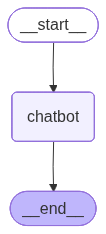

In [66]:
from IPython.display import Image,display
try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [67]:
from langchain_core.messages import HumanMessage
initial_state = {'messages':[HumanMessage(content="how to apply german study visa and which universistat are best for llm reserach?")]}

In [69]:
thread_id = '1'
while True:
    #in loop each time we invoke the message llm gave response then end the execution state remove each and every thing.
    # once again user came but user came but dont have previous hisotry becuase that was the part of privious invokation.
    message = input("User: ")
    print("User:",message)
    config = {"configurable": {"thread_id": thread_id}}
    if message.strip().lower() in ['exit','quit','bye']:
        break
    
    response = workflow.invoke({'messages':[HumanMessage(content=message)]},config=config)
    print("AI :",response['messages'][-1].content)

User: hello which one is larger 2 or 5
[HumanMessage(content='hello my name is waris', additional_kwargs={}, response_metadata={}, id='18768539-beb5-4ce8-85cb-ae88d549c797'), AIMessage(content="Hello, Waris! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={}, id='daacd23e-28c9-493f-8e9a-20e9870f2566'), HumanMessage(content='hello my name is waris', additional_kwargs={}, response_metadata={}, id='fb00ffb1-e116-4ba6-b428-31f4b1a77833'), AIMessage(content="Hello again, Waris! It's good to hear from you. What can I help you with today?", additional_kwargs={}, response_metadata={}, id='2d5e2cf5-7fce-47f3-aaa3-94245cdc0cbb'), HumanMessage(content='do you know who i am?', additional_kwargs={}, response_metadata={}, id='8a640ac8-acda-4ffa-9047-a81e1a810cd2'), AIMessage(content='As an AI, I don\'t have personal memory or the ability to "know" individuals like a human does. My interactions are stateless, meaning I don\'t retain information about you b